In [1]:
# ! pip install ydata-profiling

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv("red_wine.csv")
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [4]:
profile = ProfileReport(df, title="Profiling Report")
#profile.to_notebook_iframe()

In [5]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# TASK 3
### Question 2

In [6]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Split the data into features (X) and the target (y)
X = data.drop(columns='type')
y = data['type']

# Define the models
models = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Naive Bayes B" : BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear'),
    "SVM-RBF": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier()
}

# Initialize lists to store AUC and Accuracy scores
model_names = []
auc_scores = []
accuracy_scores = []

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    # Calculate AUC scores
    auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    auc_mean = auc.mean()
    
    # Calculate Accuracy scores
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    accuracy_mean = accuracy.mean()

    # Append results to lists
    model_names.append(model_name)
    auc_scores.append(auc_mean)
    accuracy_scores.append(accuracy_mean)

# Calculate the Baseline AUC and Accuracy
baseline_auc = cross_val_score(DummyClassifier(strategy="most_frequent"), X, y, cv=10, scoring='roc_auc').mean()
baseline_accuracy = cross_val_score(DummyClassifier(strategy="most_frequent"), X, y, cv=10, scoring='accuracy').mean()

# Create DataFrames for results
results_df = pd.DataFrame({
    "Model": model_names,
    "AUC": auc_scores,
    "Accuracy": accuracy_scores
})

'''
baseline_results = pd.DataFrame({
    "Model": ["Baseline"],
    "AUC": [baseline_auc],
    "Accuracy": [baseline_accuracy]
})
'''

# Concatenate DataFrames
results_df = pd.concat([results_df], ignore_index=True)

# Print the DataFrame
results_df


,Model,AUC,Accuracy
0,Baseline,0.500000,0.528887
1,Logistic Regression,0.879902,0.784785
2,Naive Bayes,0.895408,0.821627
3,Naive Bayes B,0.525470,0.551543
4,Decision Tree,0.753343,0.756776
5,SVM-Linear,0.881489,0.791863
6,SVM-RBF,0.868920,0.535844
7,Random Forest,0.894399,0.807562


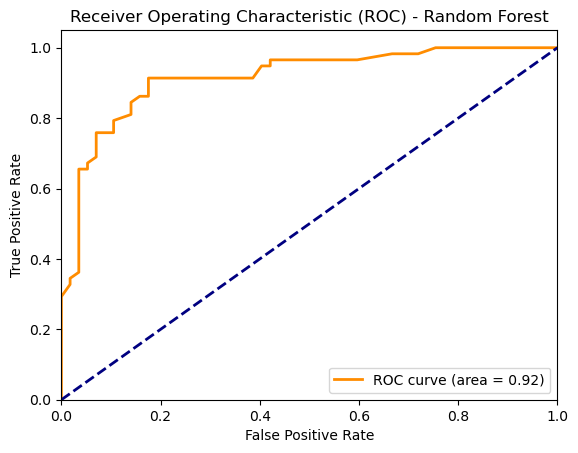

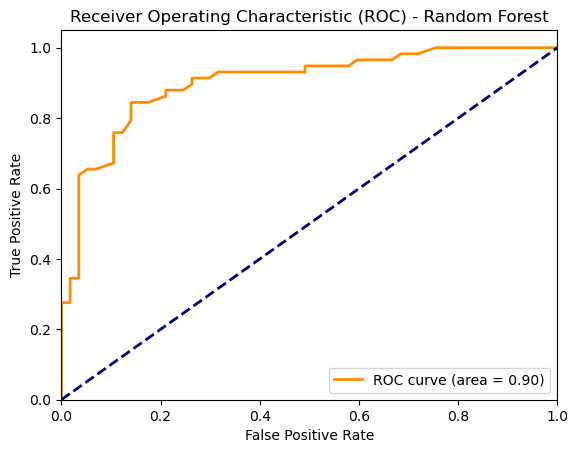

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
data = pd.read_csv('red_wine.csv')

# Convert string labels to binary labels. For instance, let's assume 'high' is the positive class.
data['binary_type'] = data['type'].apply(lambda x: 1 if x == 'high' else 0)

# Split the data into features (X) and the target (y)
X = data.drop(columns=['type', 'binary_type'])  # dropping the original 'type' column
y = data['binary_type']  # using the binary labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_score = rf.predict_proba(X_test)[:, 1]  # getting probabilities for the positive class

# Compute ROC curve and ROC area. We specify the positive label. 
# If 'high' is your positive class, the pos_label should be 1 after your label binarization above.
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)  # pos_label is the label of the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()


### Q4 Unsure about this

In [8]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

df = pd.read_csv("white_wine.csv")
feature_columns = ["citric acid","sulphates","alcohol"]  
target_column = 'type'

# Assuming you have df, feature_columns, and target_column defined
# Extract features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Bernoulli Naive Bayes classifier
bernoulli_naive_bayes_classifier = BernoulliNB()
bernoulli_naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = bernoulli_naive_bayes_classifier.predict(X_test)

# Calculate the predicted probabilities for the positive class
predicted_probabilities = bernoulli_naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, predicted_probabilities)

# Print the AUC score and confusion matrix
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.50


## Gaussain Naive bayes

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

df = pd.read_csv("white_wine.csv")
feature_columns = ["citric acid","sulphates","alcohol"]  
target_column = 'type'

# Assuming you have df, feature_columns, and target_column defined
# Extract features (X) and target (y) from the DataFrame
X = df[feature_columns].values
y = df[target_column].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Bernoulli Naive Bayes classifier
bernoulli_naive_bayes_classifier = GaussianNB()
bernoulli_naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = bernoulli_naive_bayes_classifier.predict(X_test)

# Calculate the predicted probabilities for the positive class
predicted_probabilities = bernoulli_naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, predicted_probabilities)

# Print the AUC score and confusion matrix
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.93


### Diferent results for same function

In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
data = pd.read_csv('white_wine.csv')

# Split the data into features (X) and the target (y)
X = data.drop(columns='type')
y = data['type']

# Define the models
models = {
    "Baseline": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Naive Bayes B" : BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel='linear'),
    "SVM-RBF": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier()
}

# Initialize lists to store AUC and Accuracy scores
model_names = []
auc_scores = []
accuracy_scores = []

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    # Calculate AUC scores
    auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    auc_mean = auc.mean()
    
    # Calculate Accuracy scores
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    accuracy_mean = accuracy.mean()

    # Append results to lists
    model_names.append(model_name)
    auc_scores.append(auc_mean)
    accuracy_scores.append(accuracy_mean)

# Calculate the Baseline AUC and Accuracy
baseline_auc = cross_val_score(DummyClassifier(strategy="most_frequent"), X, y, cv=10, scoring='roc_auc').mean()
baseline_accuracy = cross_val_score(DummyClassifier(strategy="most_frequent"), X, y, cv=10, scoring='accuracy').mean()

# Create DataFrames for results
results_df = pd.DataFrame({
    "Model": model_names,
    "AUC": auc_scores,
    "Accuracy": accuracy_scores
})

'''
baseline_results = pd.DataFrame({
    "Model": ["Baseline"],
    "AUC": [baseline_auc],
    "Accuracy": [baseline_accuracy]
})
'''

# Concatenate DataFrames
results_df = pd.concat([results_df], ignore_index=True)

# Print the DataFrame
results_df


,Model,AUC,Accuracy
0,Baseline,0.500000,0.783929
1,Logistic Regression,0.966667,0.858929
2,Naive Bayes,0.950000,0.932143
3,Naive Bayes B,0.575000,0.821429
4,Decision Tree,0.775000,0.858929
5,SVM-Linear,0.966667,0.858929
6,SVM-RBF,0.913095,0.783929
7,Random Forest,0.962500,0.923214
